In [496]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [498]:
df = pd.read_csv(r'C:\Users\kshit\Desktop\datset\data.csv')

In [499]:
print(df) # to check if the dataset has loaded correctly

          Timestamp                           station  PM2.5        PM10  \
0        2017-01-01        32Bungalows, Bhilai - CECB    NaN         NaN   
1        2017-01-01              AIIMS, Raipur - CECB    NaN         NaN   
2        2017-01-01      Adarsh Nagar, Jaipur - RSPCB    NaN         NaN   
3        2017-01-01        Airoli, Navi Mumbai - MPCB    NaN   54.743723   
4        2017-01-01        Airport Area, Indore - IMC    NaN         NaN   
...             ...                               ...    ...         ...   
1627456  2024-12-10              Worli, Mumbai - MPCB  54.71  124.420000   
1627457  2024-12-10  Yamunapuram, Bulandshahr - UPPCB  53.23  101.340000   
1627458  2024-12-10   Yerramukkapalli, Kadapa - APPCB  75.00  110.750000   
1627459  2024-12-10  Zero Point GICI, Gangtok - SSPCB    NaN         NaN   
1627460  2024-12-10       Zoo Park, Hyderabad - TSPCB  72.83  176.480000   

                                                   address         city  \
0        Bhi

In [500]:
print(df.columns)
print(df.size)


Index(['Timestamp', 'station', 'PM2.5', 'PM10', 'address', 'city', 'latitude',
       'longitude', 'state'],
      dtype='object')
14647149


In [501]:
df.rename(columns = {'Timestamp': 'timestamp'}, inplace = True)
print(df.columns)

Index(['timestamp', 'station', 'PM2.5', 'PM10', 'address', 'city', 'latitude',
       'longitude', 'state'],
      dtype='object')


In [502]:
print(df['address'].isna().sum(), df['city'].isna().sum(), sep = '\n')


240030
63759


In [503]:
df.drop('address', axis = 1, inplace = True)

print(df.isna().sum())
print(df.columns)

timestamp         0
station           0
PM2.5        899113
PM10         928447
city          63759
latitude      63759
longitude     63759
state         63759
dtype: int64
Index(['timestamp', 'station', 'PM2.5', 'PM10', 'city', 'latitude',
       'longitude', 'state'],
      dtype='object')


# 1. Spatial Aggregation

1. **Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?**

In [510]:
print(f"The state with the highest average PM2.5 concentration across all stations and all years is {df.groupby('state')['PM2.5'].mean().idxmax()} with an average concentration of {df.groupby('state')['PM2.5'].mean().max()}")

The state with the highest average PM2.5 concentration across all stations and all years is Delhi with an average concentration of 104.1009176780069


2. **Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?**

In [512]:
df['year'] = df['timestamp'].str[:4].astype(int)

high_pm25_2023 = df.query("year == 2023 and `PM2.5` > 300")
days_above_300 = high_pm25_2023.groupby('state')['timestamp'].nunique()

print(f"The state which had the most days with PM2.5 levels above 300 µg/m³ is {days_above_300.idxmax()} having {days_above_300.max()} days with hazardous PM2.5 levels")


The state which had the most days with PM2.5 levels above 300 µg/m³ is Delhi having 49 days with hazardous PM2.5 levels


3. **Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023?**  
   *(Think about how you would measure variability.)*

In [514]:
pm25_variability_2023 = df[df['year'] == 2023].groupby('state')['PM2.5'].std()

print(f"The state with the highest variability in PM2.5 levels in 2023 is \033[1m{pm25_variability_2023.idxmax()}\033[0m with a standard deviation of \033[1m{pm25_variability_2023.max()}\033[0m")


The state with the highest variability in PM2.5 levels in 2023 is Delhi with a standard deviation of 82.79710576209911


4. **Which state has the lowest average PM2.5 levels during the Covid period (the years 2020-2021, both years inclusive)?**

In [516]:
covid_period_data = df.query('year == 2020 or year == 2021')
average_pm25_covid = covid_period_data.groupby('state')['PM2.5'].mean()

print(f"The state with the lowest average PM2.5 levels during the covid period was {average_pm25_covid.idxmin()} with an average level of just {average_pm25_covid.min()}")


The state with the lowest average PM2.5 levels during the covid period was Mizoram with an average level of just 14.323350150801287


# 2. Temporal Aggregation

1. **Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.**

In [518]:
df['month'] = df['timestamp'].str[5:7].astype(int)
august_2020_data = df.query('year == 2020 and month == 8')

print(f"The station that recorded the highest value of PM2.5 for the month of August 2020 is: {august_2020_data.loc[august_2020_data['PM2.5'].idxmax()]['station']}")


The station that recorded the highest value of PM2.5 for the month of August 2020 is: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB


2. **For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.**

In [520]:
station_data = df.query("station == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB' and year == 2018")
summer = station_data.query("3 <= month <= 5")
monsoon = station_data.query("6 <= month <= 9")
winter = station_data.query("month == 12 or month == 1 or month == 2")

print(f"The average PM2.5 concentration for summer 2018 in Kalaburgi is: {summer['PM2.5'].mean()}")
print(f"The average PM2.5 concentration for monsoon 2018 in Kalaburgi is: {monsoon['PM2.5'].mean()}")
print(f"The average PM2.5 concentration for winter 2018 in Kalaburgi is: {winter['PM2.5'].mean()}")

max_season = max(
    [('summer', summer['PM2.5'].mean()), 
     ('monsoon', monsoon['PM2.5'].mean()), 
     ('winter', winter['PM2.5'].mean())],
    key=lambda x: x[1]
)[0]

print(f"The season with the highest pollution is {max_season}.")


The average PM2.5 concentration for summer 2018 in Kalaburgi is: nan
The average PM2.5 concentration for monsoon 2018 in Kalaburgi is: 34.42519611317571
The average PM2.5 concentration for winter 2018 in Kalaburgi is: 67.4923443634478
The season with the highest pollution is summer.


**[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?**

- **Summer:**  
  - Increased dust and dry conditions  
  - Higher vehicle emissions due to increased travel  
  - Forest fires or crop residue burning  

- **Monsoon:**  
  - Rain reduces pollution by washing away particulate matter  
  - Humidity can sometimes increase secondary pollutant formation  

- **Winter:**  
  - Low temperatures trap pollutants closer to the ground (temperature inversion)  
  - Increased use of heating sources (wood, coal, etc.)  
  - Low wind speeds reduce pollutant dispersion.

 3. **Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends.**  

    1. **Calculate the monthly average PM2.5 for weekdays and weekends separately**  
    2. **X-axis:** Months (January to December)  
    3. **Y-axis:** Average PM2.5 levels  
    4. **Plot:** Use two lines:  
       - One for the monthly average PM2.5 levels on weekdays  
       - One for weekends  

The monthly average for 1 is 10.43 for weekends and 23.04 for weekdays.
The monthly average for 2 is 53.95 for weekends and 56.29 for weekdays.
The monthly average for 3 is 53.17 for weekends and 51.94 for weekdays.
The monthly average for 4 is 20.7 for weekends and 21.16 for weekdays.
The monthly average for 5 is 6.84 for weekends and 6.42 for weekdays.
The monthly average for 6 is 7.7 for weekends and 9.1 for weekdays.
The monthly average for 7 is 8.65 for weekends and 6.36 for weekdays.
The monthly average for 8 is 0.0 for weekends and 0.0 for weekdays.
The monthly average for 9 is 0.0 for weekends and 0.0 for weekdays.
The monthly average for 10 is 12.59 for weekends and 5.28 for weekdays.
The monthly average for 11 is 42.09 for weekends and 48.33 for weekdays.
The monthly average for 12 is 88.99 for weekends and 74.51 for weekdays.


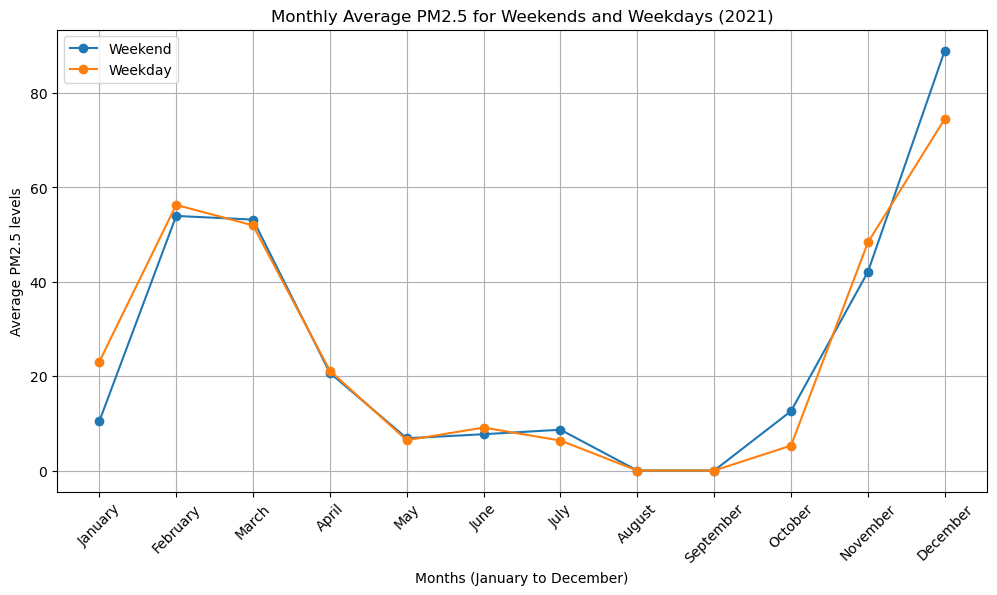

In [522]:
df = df.fillna(0)
df['day'] = df['timestamp'].astype(str).str[8:10].astype(int)
kalaburagi_2021 = df.query("station == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB' and year == 2021")

def is_weekend(row):
    day_of_week = datetime.date(row['year'], row['month'], row['day']).weekday()
    return 'weekend' if day_of_week in [5, 6] else 'weekday'

kalaburagi_2021 = kalaburagi_2021.assign(isweekend=kalaburagi_2021.apply(is_weekend, axis=1))
avg_pm_by_weekend = kalaburagi_2021.groupby(['month', 'isweekend'])['PM2.5'].mean().unstack()

for month in sorted(kalaburagi_2021['month'].unique()):
    weekend_avg = avg_pm_by_weekend.loc[month, 'weekend'] if 'weekend' in avg_pm_by_weekend.columns else "N/A"
    weekday_avg = avg_pm_by_weekend.loc[month, 'weekday'] if 'weekday' in avg_pm_by_weekend.columns else "N/A"
    print(f"The monthly average for {month} is {round(weekend_avg, 2)} for weekends and {round(weekday_avg, 2)} for weekdays.")

months = [datetime.date(2021, i, 1).strftime('%B') for i in range(1, 13)]

plt.figure(figsize=(12, 6))
plt.plot(months, avg_pm_by_weekend['weekend'], label='Weekend', marker='o')
plt.plot(months, avg_pm_by_weekend['weekday'], label='Weekday', marker='o')
plt.xticks(rotation=45)
plt.xlabel('Months (January to December)')
plt.ylabel('Average PM2.5 levels')
plt.title('Monthly Average PM2.5 for Weekends and Weekdays (2021)')
plt.legend()
plt.grid(True)
plt.show()


# 3. Spatio-temporal aggregation

1. **For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?**

In [534]:
temp = df.query('year == 2022')

monsoon_pm = temp.query("6 <= month <= 9").groupby('state')['PM2.5'].mean()
summer_pm = temp.query("3 <= month <= 5").groupby('state')['PM2.5'].mean()

seasonal_pm = pd.concat([monsoon_pm, summer_pm], axis=1, keys=['monsoon', 'summer']).dropna()

percentage_change = (seasonal_pm['summer'] - seasonal_pm['monsoon']) / seasonal_pm['monsoon']

for state, pct_change in percentage_change.items():
    print(f"The percent change for the state {state} from monsoon to summer is {round(pct_change * 100, 2)}%")

max_change_state = percentage_change.abs().idxmax()
max_change_value = percentage_change[max_change_state]

print("\n")
print(f"The state with the most difference is {max_change_state} with a change of {round(max_change_value * 100, 2)}%")


The percent change for the state 0 from monsoon to summer is nan%
The percent change for the state Andhra Pradesh from monsoon to summer is 42.69%
The percent change for the state Arunachal Pradesh from monsoon to summer is 124.24%
The percent change for the state Assam from monsoon to summer is 147.43%
The percent change for the state Bihar from monsoon to summer is 106.93%
The percent change for the state Chandigarh from monsoon to summer is 84.24%
The percent change for the state Chhattisgarh from monsoon to summer is 39.7%
The percent change for the state Delhi from monsoon to summer is 134.48%
The percent change for the state Gujarat from monsoon to summer is 240.0%
The percent change for the state Haryana from monsoon to summer is 95.0%
The percent change for the state Himachal Pradesh from monsoon to summer is 42.8%
The percent change for the state Jammu and Kashmir from monsoon to summer is 0.83%
The percent change for the state Jharkhand from monsoon to summer is nan%
The perc

2. **Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?**

137.22105767007864 63.33837835691552 34.59503070343664


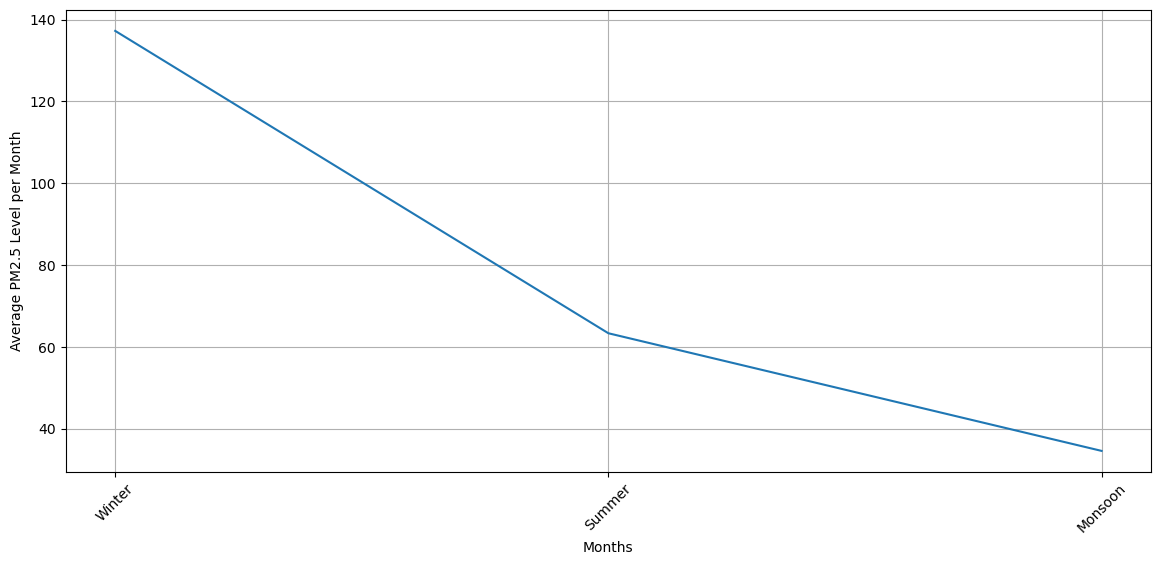

We can observe a decreasing trend in the seasonal variation.


In [536]:
temp = df.query("state == 'Delhi' and 2017 <= year <= 2023")

summer_pm = temp.query("3 <= month <= 5")
monsoon_pm = temp.query("6 <= month <= 9")
winter_pm = temp.query("month == 12 or month == 1 or month == 2")

print(winter_pm['PM2.5'].mean(), summer_pm['PM2.5'].mean(), monsoon_pm['PM2.5'].mean())

plt.figure(figsize = (14, 6))
plt.plot(['Winter', 'Summer', 'Monsoon'], [winter_pm['PM2.5'].mean(), summer_pm['PM2.5'].mean(), monsoon_pm['PM2.5'].mean()])
plt.xticks(rotation=45)
plt.xlabel('Months')
plt.ylabel('Average PM2.5 Level per Month')
plt.grid(True)
plt.show()

print("We can observe a decreasing trend in the seasonal variation.")


3. **Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)**

Fluctuation in PM2.5 levels for Delhi (2015-2023): 23.89
Fluctuation in PM2.5 levels for Mumbai (2015-2023): 14.26


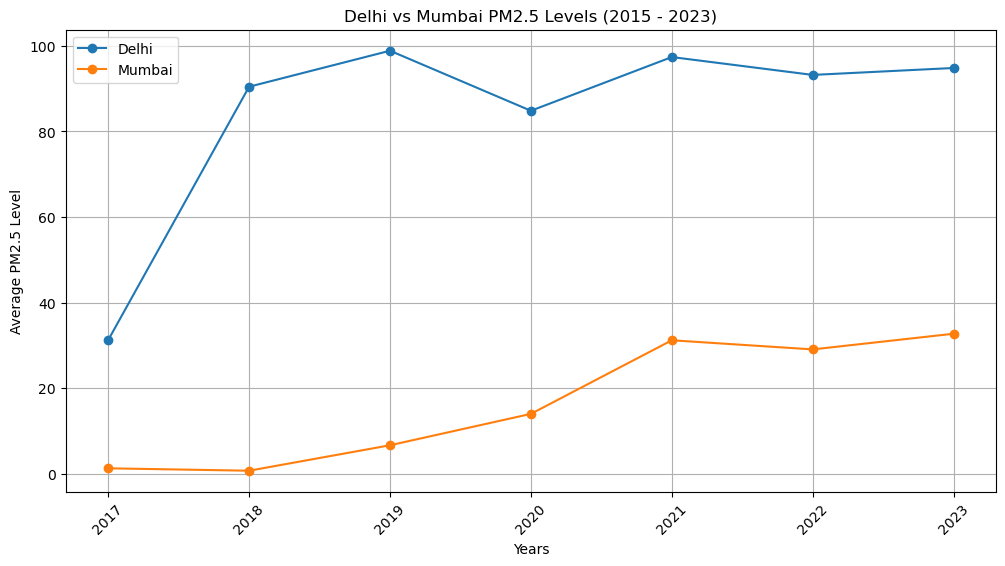

In [538]:
delhi_pm = df.query("city == 'Delhi' and 2015 <= year <= 2023").groupby('year')['PM2.5'].mean()
mumbai_pm = df.query("city == 'Mumbai' and 2015 <= year <= 2023").groupby('year')['PM2.5'].mean()

delhi_fluctuation = delhi_pm.std()
mumbai_fluctuation = mumbai_pm.std()

print(f"Fluctuation in PM2.5 levels for Delhi (2015-2023): {delhi_fluctuation:.2f}")
print(f"Fluctuation in PM2.5 levels for Mumbai (2015-2023): {mumbai_fluctuation:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(delhi_pm.index, delhi_pm, label='Delhi', marker='o')
plt.plot(mumbai_pm.index, mumbai_pm, label='Mumbai', marker='o')

plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Average PM2.5 Level')
plt.title('Delhi vs Mumbai PM2.5 Levels (2015 - 2023)')
plt.legend()
plt.grid(True)
plt.show()


# 4. Population-Based

1. **Which state in India has the highest number of monitoring stations relative to its population?**

In [540]:
popn = pd.read_csv(r'C:\Users\kshit\Desktop\datset\State_data.csv')
popn.rename(columns={'State': 'state'}, inplace=True)
popn.set_index('state', inplace=True)

temp = df.groupby('state')['station'].nunique()

holding = ['', 0]

for state in popn.index:
    if state in temp.index:  
        ratio = temp[state] / popn.loc[state, 'Population']
        if ratio >= holding[1]:
            holding = [state, ratio]

print(f"{holding[0]} is the state with the highest number of monitoring stations relative to its population with {temp[holding[0]]} stations")


Chandigarh is the state with the highest number of monitoring stations relative to its population with 3 stations


2. **Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.**

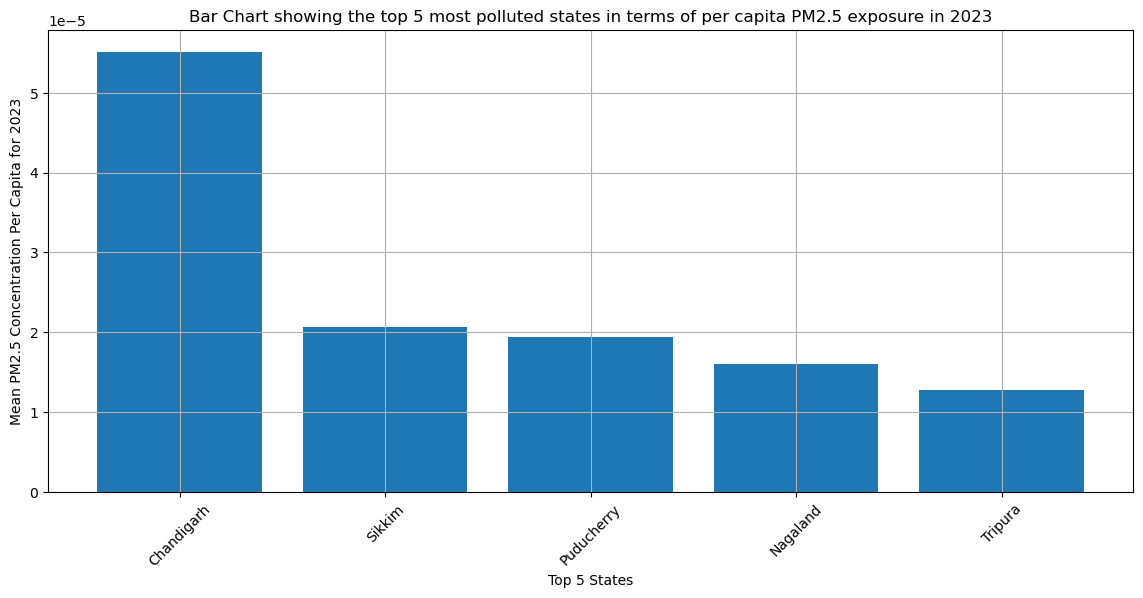

In [543]:
temp = df.query("year == 2023").groupby('state')['PM2.5'].mean()
temp2 = popn['Population']
temp3 = pd.concat([temp, temp2], axis = 1)

temp3['ratio'] = temp3['PM2.5']/temp3['Population']

temp3.sort_values(by = ['ratio'], ascending = False, inplace = True)
temp3 = temp3.head(5)

plt.figure(figsize = (14, 6))
plt.bar(temp3.index, temp3['ratio'])

plt.xticks(rotation=45)
plt.xlabel('Top 5 States')
plt.ylabel('Mean PM2.5 Concentration Per Capita for 2023')
plt.title('Bar Chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023')
plt.grid(True)
plt.show()


3. **Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?**
    1. X-axis: Population density (people per square kilometer).
    2. Y-axis: Average PM2.5 concentration.
    3. Use a scatter plot to show the relationship, where each point represents a state.

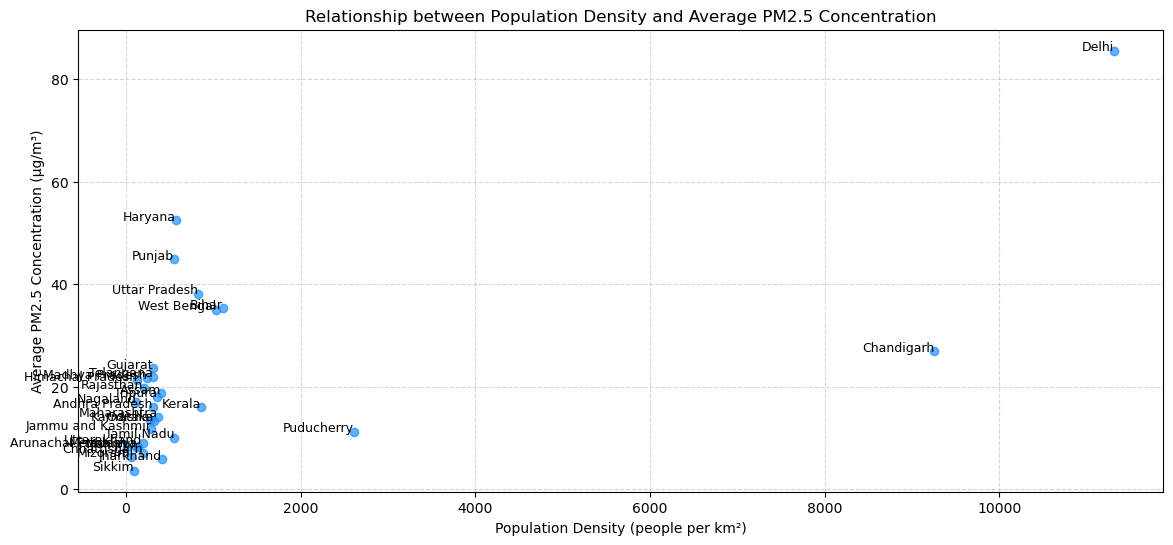

In [546]:
popn['density'] = popn['Population'] / popn['Area (km2)']
temp = df.groupby('state')['PM2.5'].mean()
temp2 = pd.concat([temp, popn['density']], axis=1).dropna()
temp2.columns = ['Average_PM2.5', 'Population_Density']

plt.figure(figsize=(14, 6))
plt.scatter(temp2['Population_Density'], temp2['Average_PM2.5'], color='dodgerblue', alpha=0.7)
plt.title('Relationship between Population Density and Average PM2.5 Concentration')
plt.xlabel('Population Density (people per km²)')
plt.ylabel('Average PM2.5 Concentration (µg/m³)')
plt.grid(True, linestyle='--', alpha=0.5)

for state, row in temp2.iterrows():
    plt.text(row['Population_Density'], row['Average_PM2.5'], state, fontsize=9, ha='right')

plt.show()

# 5. Area Based

1. **Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.**
    1. X-axis: States.
    2. Y-axis: PM2.5 concentration per square kilometer.
    3. Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.

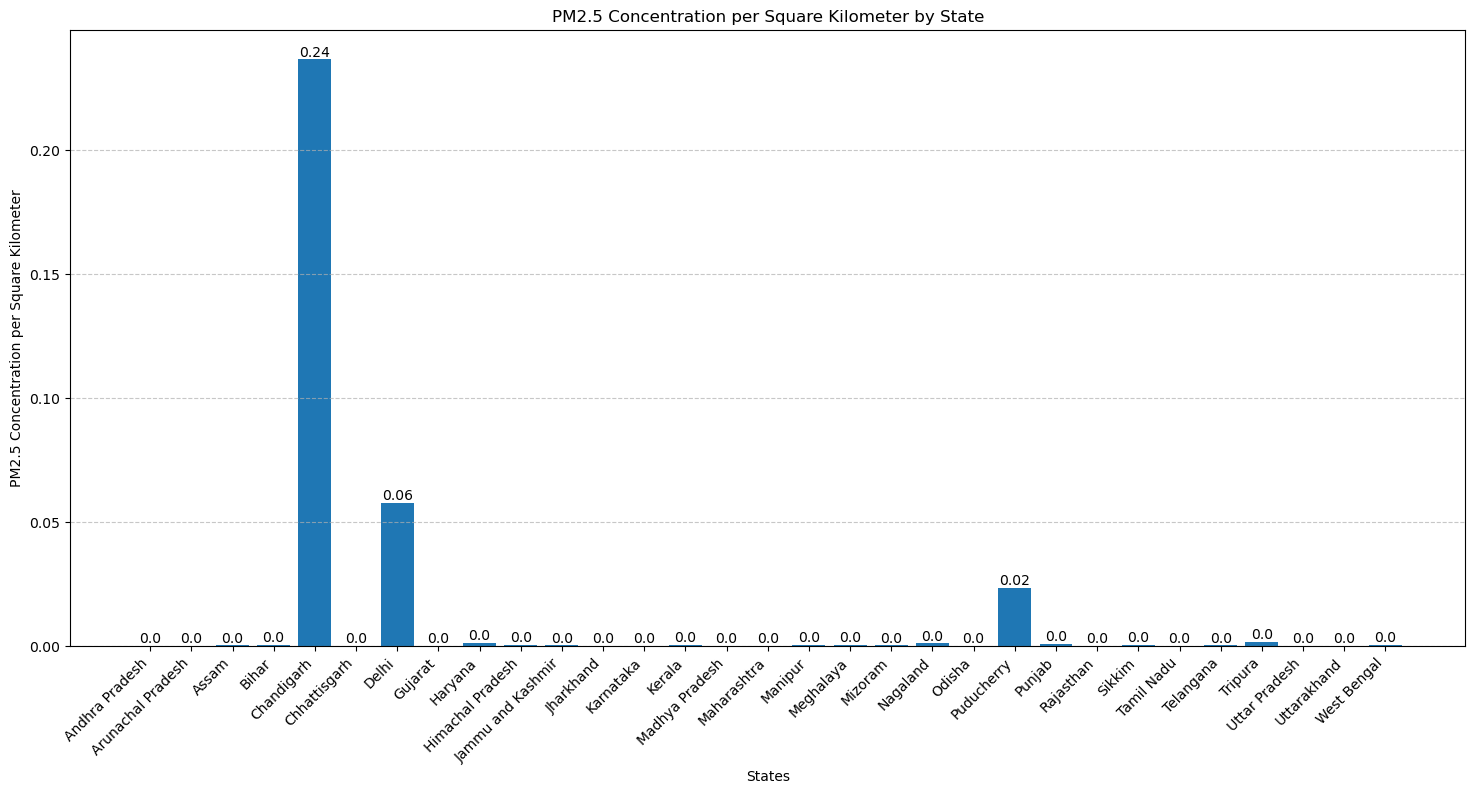

In [599]:
state_pm25_avg = df.groupby('state')['PM2.5'].mean().to_frame(name='PM2.5')
state_pm25_avg['area'] = popn['Area (km2)']
state_pm25_avg['pm25_per_area'] = state_pm25_avg['PM2.5'] / state_pm25_avg['area']

state_pm25_avg = state_pm25_avg[state_pm25_avg['pm25_per_area'].notna() & (state_pm25_avg['pm25_per_area'] != float('inf'))]

x = range(len(state_pm25_avg))

plt.figure(figsize=(18, 8))

bars = plt.bar(x, state_pm25_avg['pm25_per_area'])

plt.xticks(x, state_pm25_avg.index, rotation=45, ha='right')

plt.xlabel('States')
plt.ylabel('PM2.5 Concentration per Square Kilometer')
plt.title('PM2.5 Concentration per Square Kilometer by State')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    if not (yval == float('inf') or yval != yval):  
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


2. **Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.**

       station_count  area_km2  station_density
state                                          
Delhi             40    1484.0         0.026954


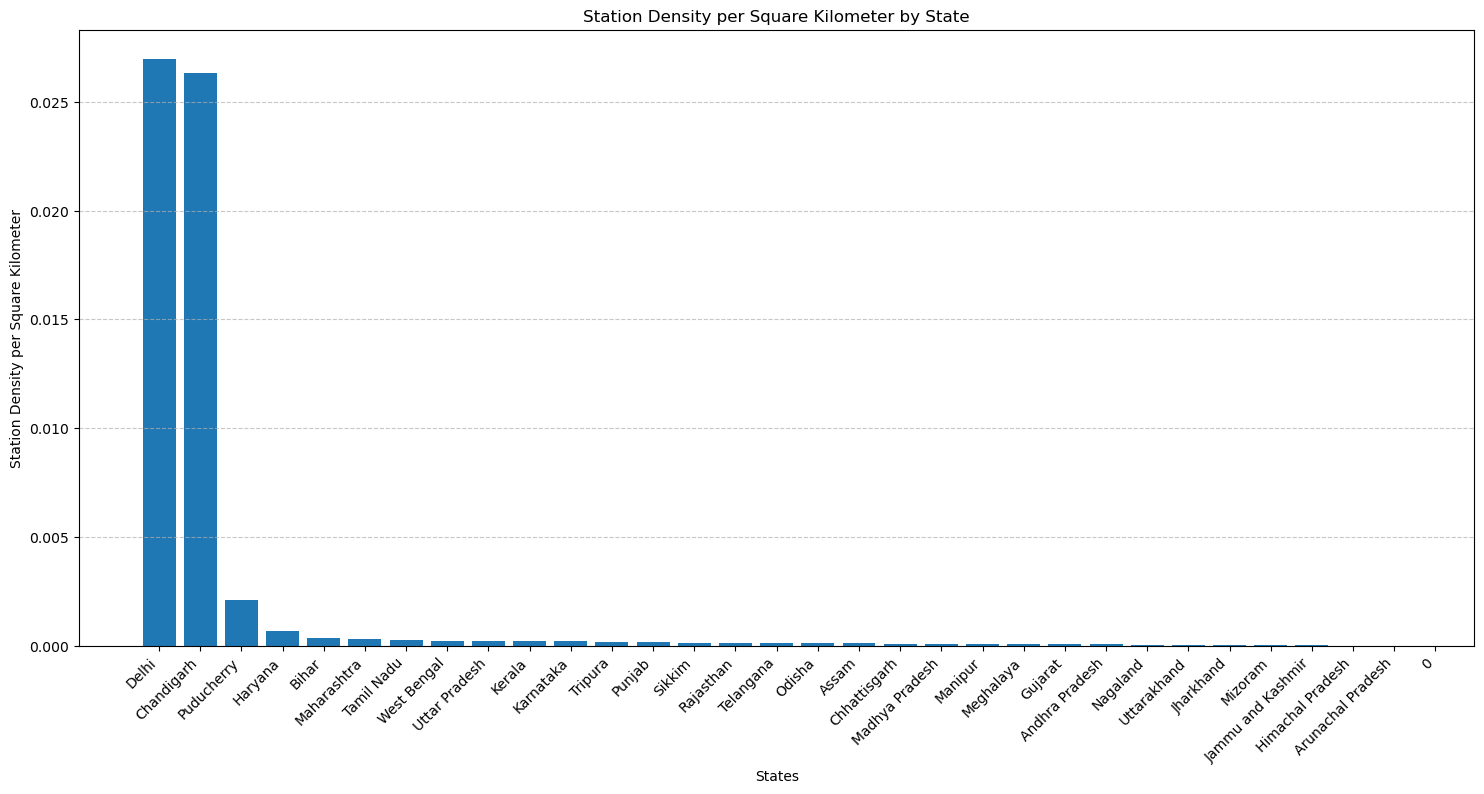

In [593]:
stations_per_state = df.groupby('state')['station'].nunique().to_frame(name='station_count')
stations_per_state['area_km2'] = popn['Area (km2)']
stations_per_state['station_density'] = stations_per_state['station_count'] / stations_per_state['area_km2']
stations_per_state.sort_values(by='station_density', ascending=False, inplace=True)

print(stations_per_state.head(1))

plt.figure(figsize=(18, 8))
plt.bar(stations_per_state.index.astype(str), stations_per_state['station_density'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('States')
plt.ylabel('Station Density per Square Kilometer')
plt.title('Station Density per Square Kilometer by State')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


3. **Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.**

The average PM2.5 levels for Maharashtra and Madhya Pradesh for the year 2021 is 16.943878245950337 and 24.700029531979887


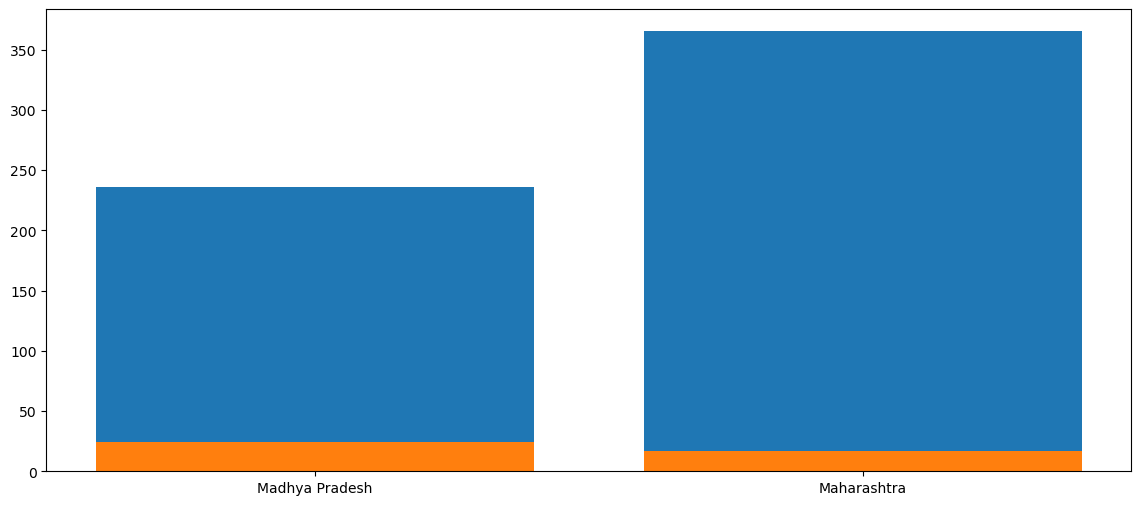

In [601]:
temp = df.query("(state == 'Maharashtra' or state == 'Madhya Pradesh') and year == 2021").groupby('state')['PM2.5'].mean().to_frame(name = 'PM2.5')

temp['population'] = popn['Population']
temp['area'] = popn['Area (km2)']
temp['density'] = temp['population']/temp['area']

print(f"The average PM2.5 levels for Maharashtra and Madhya Pradesh for the year 2021 is {temp.loc['Maharashtra']['PM2.5']} and {temp.loc['Madhya Pradesh']['PM2.5']}")

plt.figure(figsize = (14, 6))
plt.bar(temp.index, temp['density'], label = 'Population Density')
plt.bar(temp.index, temp['PM2.5'], label = 'Pollution')

plt.show()

4. **Which state has the highest number of monitoring stations per unit area?**

In [603]:
stations_per_area = df.groupby('state')['station'].nunique().to_frame(name='station_count')
stations_per_area['area'] = popn['Area (km2)']
stations_per_area['station_density'] = stations_per_area['station_count'] / stations_per_area['area']

stations_per_area.sort_values(by='station_density', ascending=False, inplace=True)

highest_station_density_state = stations_per_area.head(1)

print(f"The state with the highest number of monitoring stations per unit area is {highest_station_density_state.index[0]} with a density of {highest_station_density_state['station_density'].values[0]}")


The state with the highest number of monitoring stations per unit area is Delhi with a density of 0.026954177897574125


# 6. Funding Based

In [560]:
ncap = pd.read_csv(r'C:\Users\kshit\Desktop\datset\NCAP_Funding.csv')
ncap.set_index('S. No.', inplace = True)
mask = (ncap == '-')
ncap[mask] = 0
ncap.iloc[:, 2:] = ncap.iloc[:, 2:].astype(float)
ncap['State'] = ncap['State'].replace({'Jammu & Kashmir': 'Jammu and Kashmir'})  
ncap

,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
S. No.,,,,,,,
1,Andhra Pradesh,Vijaywada,6.0,0.0,0.0,6.00,22.91
2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
5,Andhra Pradesh,Visakhapatnam,0.12,0.0,0.0,0.12,22.91
...,...,...,...,...,...,...,...
113,West Bengal,Kolkata,6.0,0.0,0.0,6.00,19.0
114,West Bengal,Howrah,0.0,5.0,0.0,5.00,19.0
115,West Bengal,Haldia,0.0,3.0,0.0,3.00,19.0


1. **Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.**

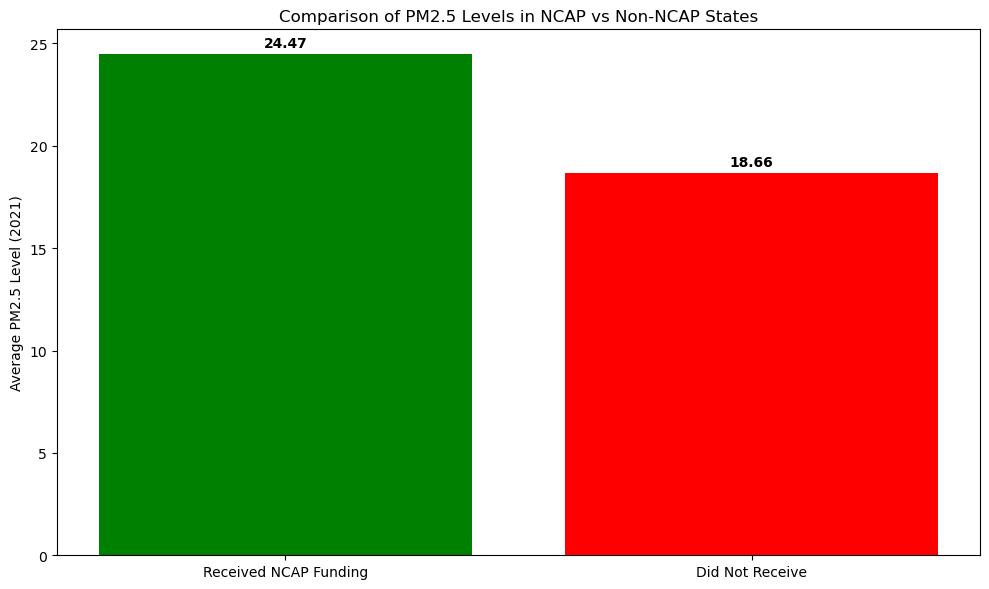

In [563]:
temp = ncap.groupby('State')['Amount released during FY 2021-22'].sum()
temp.sort_index(inplace=True)
mask = temp > 0
received = temp[mask]
didnt_receive = temp[~mask]

pm2_21 = df.query("year == 2021").groupby('state')['PM2.5'].mean()

pm2_received = pm2_21[received.index].mean()
pm2_didnt_receive = pm2_21[didnt_receive.index].mean()

categories = ["Received NCAP Funding", "Did Not Receive"]
values = [pm2_received, pm2_didnt_receive]

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=['green', 'red'])
plt.bar_label(bars, fmt='%.2f', padding=3, fontsize=10, fontweight='bold')

plt.ylabel("Average PM2.5 Level (2021)")
plt.title("Comparison of PM2.5 Levels in NCAP vs Non-NCAP States")
plt.tight_layout()
plt.show()

2. **Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?**

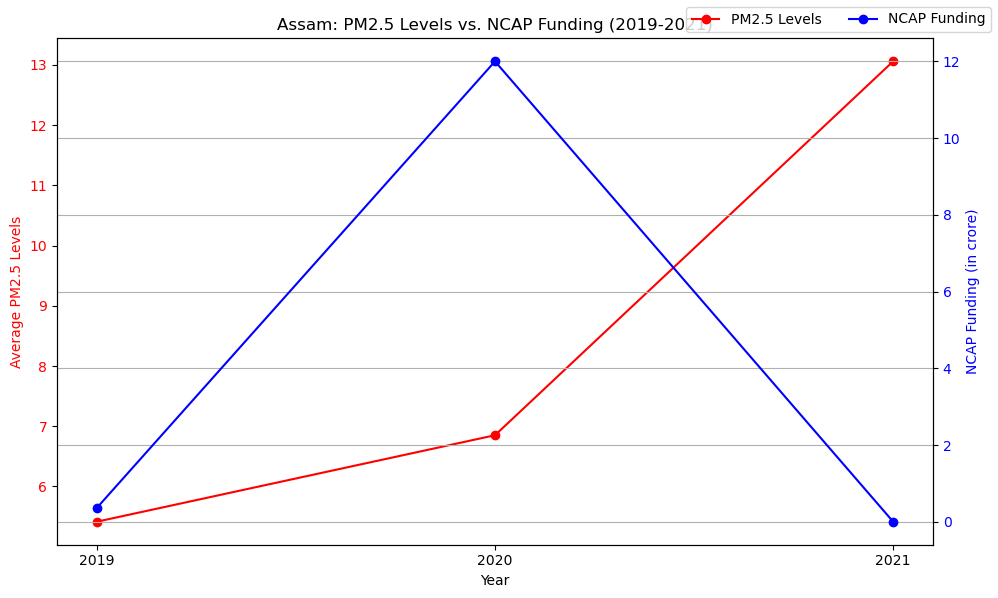

In [566]:
assam_funding = ncap[ncap['State'] == 'Assam']

assam_19 = assam_funding['Amount released during FY 2019-20'].sum()
assam_20 = assam_funding['Amount released during FY 2020-21'].sum()
assam_21 = assam_funding['Amount released during FY 2021-22'].sum()

assam_pm2_19 = df[df['year'] == 2019].query("state == 'Assam'")['PM2.5'].mean()
assam_pm2_20 = df[df['year'] == 2020].query("state == 'Assam'")['PM2.5'].mean()
assam_pm2_21 = df[df['year'] == 2021].query("state == 'Assam'")['PM2.5'].mean()

years = [2019, 2020, 2021]
funding_values = [assam_19, assam_20, assam_21]
pm25_values = [assam_pm2_19, assam_pm2_20, assam_pm2_21]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(years, pm25_values, label='PM2.5 Levels', color='red', marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average PM2.5 Levels', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_xticks(years)

ax2 = ax1.twinx()
ax2.plot(years, funding_values, label='NCAP Funding', color='blue', marker='o')
ax2.set_ylabel('NCAP Funding (in crore)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Assam: PM2.5 Levels vs. NCAP Funding (2019-2021)')
fig.legend(loc="upper right", ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


**3.  Create a scatter plot to showcase the area versus funding received by a state.**
**Mark every state with a different color and show the legend outside the plot.**

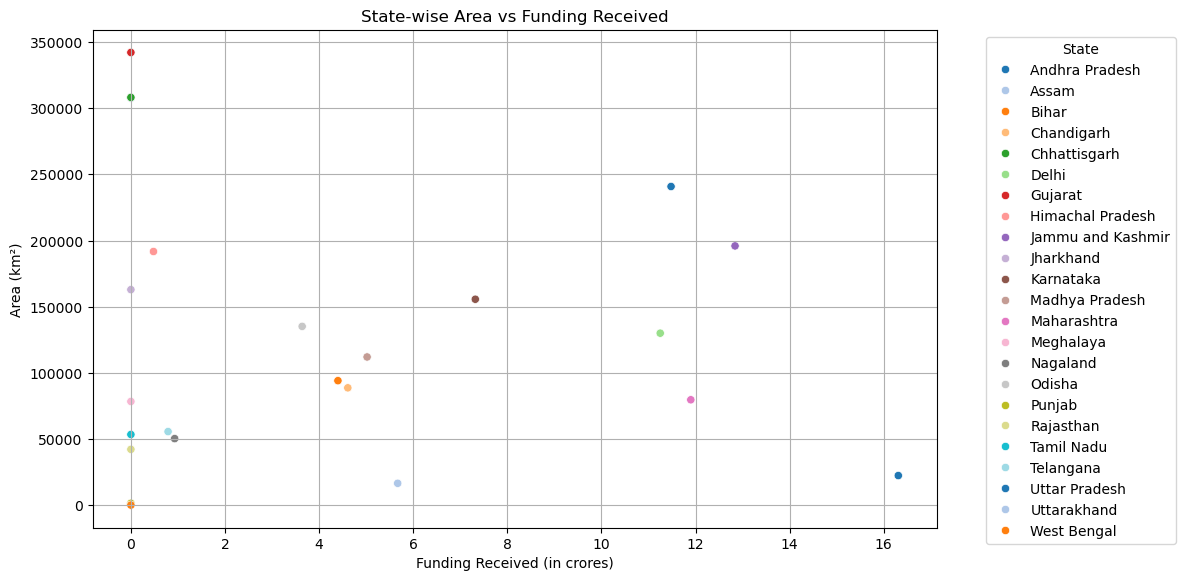

In [569]:
state_data = pd.DataFrame({
    'State': temp.index,
    'Area (km2)': area.values,
    'Total fund': temp.values
})

plt.figure(figsize=(12, 6))
sns.scatterplot(data=state_data, x='Total fund', y='Area (km2)', hue='State', palette='tab20')

plt.xlabel('Funding Received (in crores)')
plt.ylabel('Area (km²)')
plt.title('State-wise Area vs Funding Received')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="State")

plt.grid(True)

plt.tight_layout()
plt.show()


## 7. Miscellaneous Questions



**1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 μg/m³)**

In [573]:
temp = df.query("year == 2023").groupby('city')['PM2.5'].mean()
most_polluted_city = temp.idxmax()
pollution_level = temp.max()

temp2 = df.query("year == 2023")

count1 = temp2[(temp2['city'] == most_polluted_city) & (temp2['PM2.5'] > 300)].shape[0]
count2 = temp2[(temp2['city'] == most_polluted_city)].shape[0]
print(f"Percentage of days with PM2.5 > 300 in {most_polluted_city} (2023): {round(((count1/count2) * 100), 3)}%")

Percentage of days with PM2.5 > 300 in Byrnihat (2023): 4.384%


**2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020).
Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?**

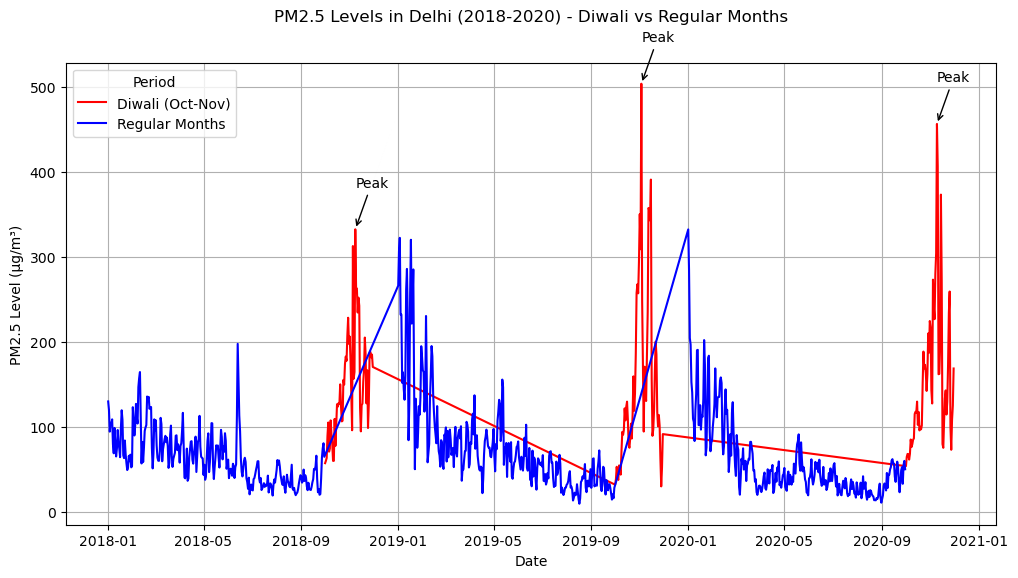

In [576]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
data_delhi = df[df['state'] == 'Delhi']
data_diwali_del = data_delhi[(data_delhi['timestamp'].dt.month == 10) | (data_delhi['timestamp'].dt.month == 11)]
data_rmonths_del = data_delhi[data_delhi['timestamp'].dt.month.isin([1, 2, 3, 4, 5, 6, 7, 8, 9])]
diwali_3years = data_diwali_del[(data_diwali_del['year'] >= 2018) & (data_diwali_del['year'] <= 2020)]
rmonths_3years = data_rmonths_del[(data_rmonths_del['year'] >= 2018) & (data_rmonths_del['year'] <= 2020)]
diwali_avg_pm = diwali_3years.groupby(diwali_3years['timestamp'].dt.date)['PM2.5'].mean()
rmonths_avg_pm = rmonths_3years.groupby(rmonths_3years['timestamp'].dt.date)['PM2.5'].mean()

plt.figure(figsize=(12, 6))
diwali_avg_pm.plot(label='Diwali (Oct-Nov)', color='red')
rmonths_avg_pm.plot(label='Regular Months', color='blue')

for Year in [2018, 2019, 2020]:
    data_diwali_Year = diwali_3years[diwali_3years['year'] == Year]
    diwali_avg_pm_Year = data_diwali_Year.groupby(data_diwali_Year['timestamp'].dt.date)['PM2.5'].mean()
    spike_date_Year = diwali_avg_pm_Year.idxmax()
    spike_value_Year = diwali_avg_pm_Year.max()
    
    plt.annotate('Peak', xy=(spike_date_Year, spike_value_Year), xytext=(spike_date_Year, spike_value_Year + 50),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), color='black')

plt.title('PM2.5 Levels in Delhi (2018-2020) - Diwali vs Regular Months', pad=30)
plt.xlabel('Date')
plt.ylabel('PM2.5 Level (µg/m³)')
plt.legend(title='Period')
plt.grid(True)
plt.show()


**3. Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023.  
Use a line graph to compare yearly average PM2.5 trends.**

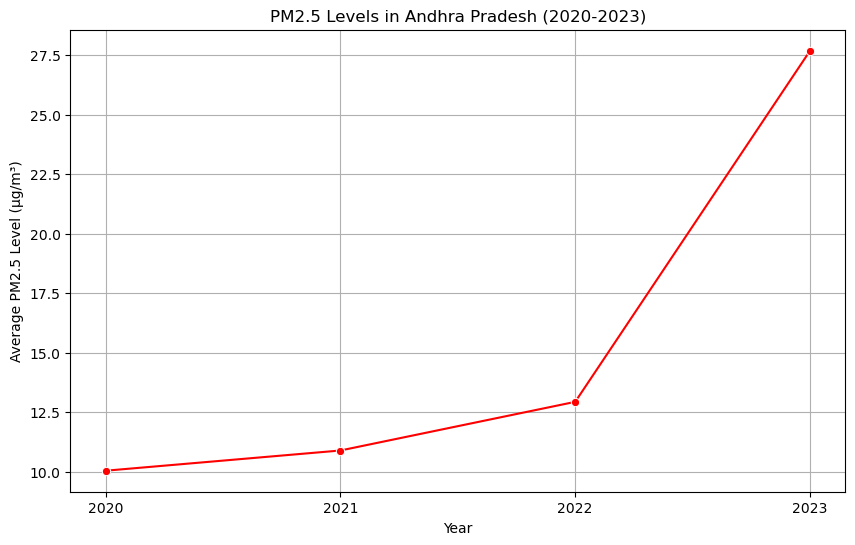

In [578]:
temp = ncap.groupby('State').sum()
temp.drop(columns=['City'], inplace=True)
temp = temp['Amount released during FY 2020-21']

max_state = temp.idxmax()

temp2 = df.query(f"2020 <= year <= 2023 and state == '{max_state}'").groupby('year')['PM2.5'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(data=temp2, marker='o', color='red')

plt.title(f'PM2.5 Levels in {max_state} (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level (µg/m³)')
plt.xticks(ticks=[2020, 2021, 2022, 2023], labels=[2020, 2021, 2022, 2023])  # Set years as integers
plt.grid(True)
plt.show()


**4. Draw the map of India and plot the sensor locations on the map.**

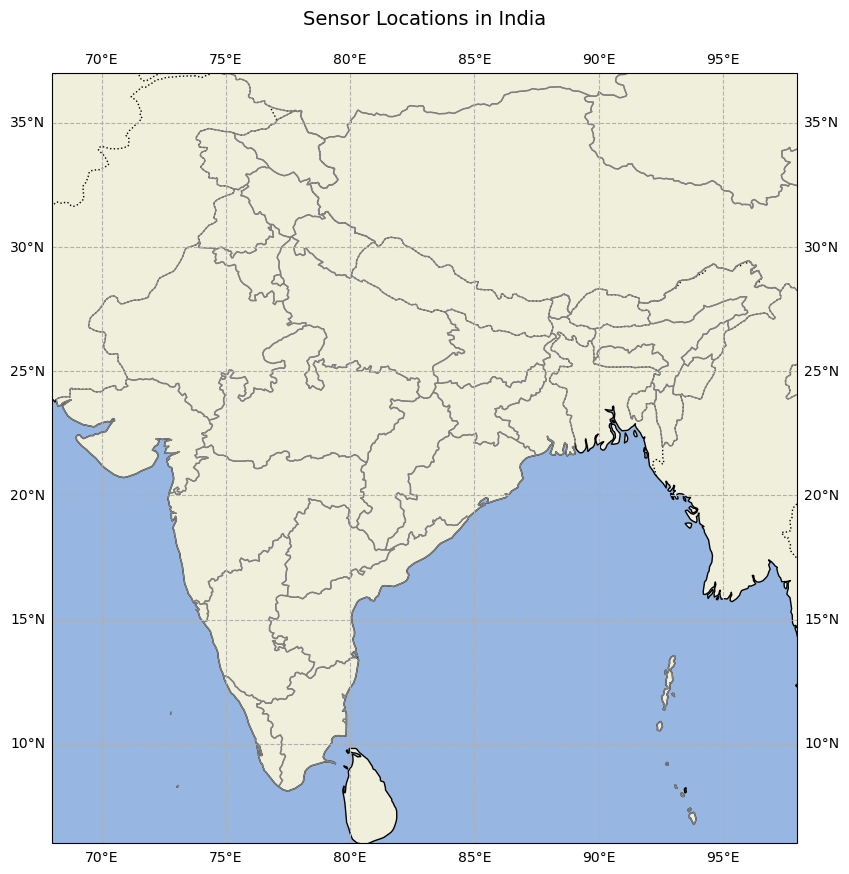

In [581]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection = ccrs.PlateCarree())

ax.set_extent([68, 98, 6, 37], crs=ccrs.PlateCarree())  

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, edgecolor='gray')

ax.gridlines(draw_labels=True, linestyle='--')


plt.title('Sensor Locations in India', fontsize=14, pad=20)

plt.show()

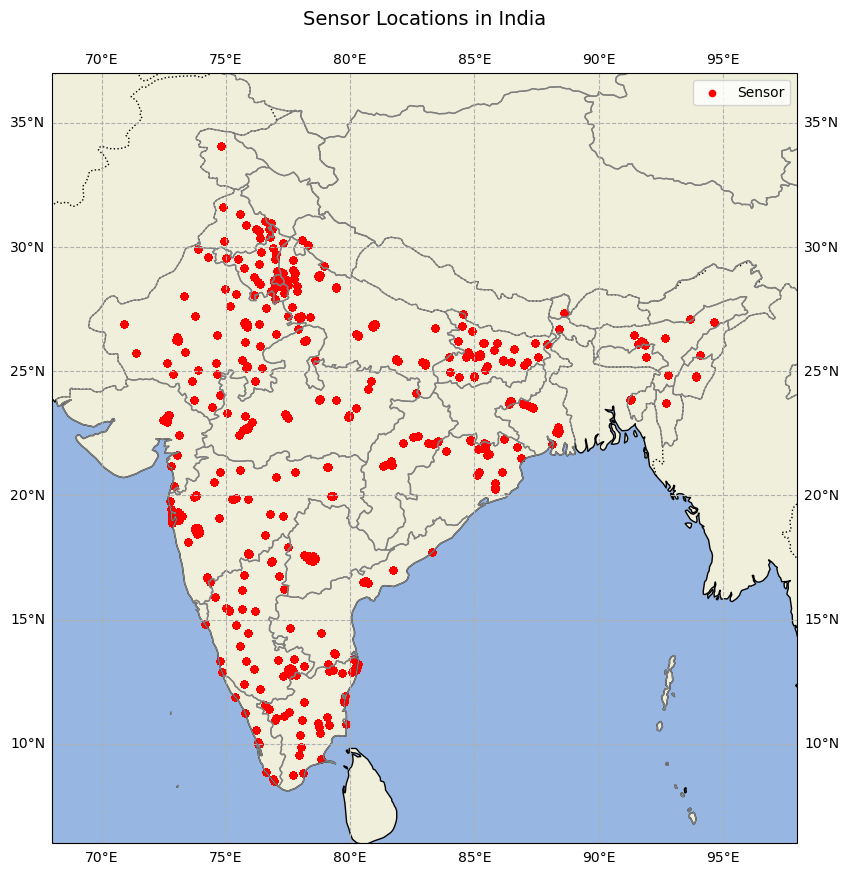

In [583]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


data_cleaned = df.dropna(subset = ['latitude', 'longitude'])

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1, projection = ccrs.PlateCarree())
ax.set_extent([68, 98, 6, 37], crs = ccrs.PlateCarree())  

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, edgecolor='gray')
ax.gridlines(draw_labels=True, linestyle='--')


ax.scatter(data_cleaned['longitude'], data_cleaned['latitude'], color = 'red', marker = 'o', s = 20, label = 'Sensor')
plt.legend()
plt.title('Sensor Locations in India', fontsize = 14, pad = 20)

plt.show()

## Tell us something new 

**1.  Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers**

- Covid significantly reduced the pollution in states and cities compared to the non covid years
- Pollution goes as high as 1000 µg/m³ during diwali which way exceeds WHO limits.
- India in general has poor air quality.
- Delhi has worsened air quality during winter months due to persistent stubble burning in agricultural dependant states like Punjab and Haryana.
- NCAP funding has no direct correlation in reduction of pollution levels.
- Lots of missing data indicate poor data capturing techniques.